In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("data/processed_tweet.csv")

# Calculate TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
df.fillna({"text": "None"}, inplace=True)

In [40]:
text = df["text"]
vectoriser = TfidfVectorizer(max_df=0.9, min_df=10, stop_words='english')
matrix = vectoriser.fit_transform(text)

In [41]:
matrix.shape

(6444, 1077)

# Most Important Word

Use TF-IDF to find most important word in each tweet

In [42]:
important_words = []
feature_names = vectoriser.get_feature_names_out()

for sentence_idx in range(matrix.shape[0]):
    tfidf_scores = matrix[sentence_idx].toarray().flatten()
    if sum(tfidf_scores == np.zeros(matrix.shape[1])) == matrix.shape[1]:
        important_words.append(np.nan)
        continue
    max_idx = np.argmax(tfidf_scores)
    important_word = feature_names[max_idx]
    important_words.append(important_word)

df["most_important_word"] = important_words

In [43]:
df.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities,most_important_word
0,780925634159796224,HillaryClinton,question election put plans action make life b...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...,question
1,780916180899037184,HillaryClinton,last night donald trump said paying taxes smar...,True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...,paying
2,780911564857761793,HillaryClinton,couldnt proud hillaryclinton vision command la...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN,showed
3,780907038650068994,HillaryClinton,stand together theres nothing cant make sure y...,False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...,theres
4,780897419462602752,HillaryClinton,candidates asked theyd confront racial injusti...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN,answer


In [31]:
tweets = pd.read_csv("data/tweets.csv")
tweets["most_important_word"] = df["most_important_word"]

In [32]:
tweets.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities,most_important_word
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...,question
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...,paying
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN,showed
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...,theres
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN,answer


In [37]:
tweets.to_csv("data/tweets_wmost_important_word.csv", index=False)

# Building a Visualisation

In [33]:
from sklearn.decomposition import PCA

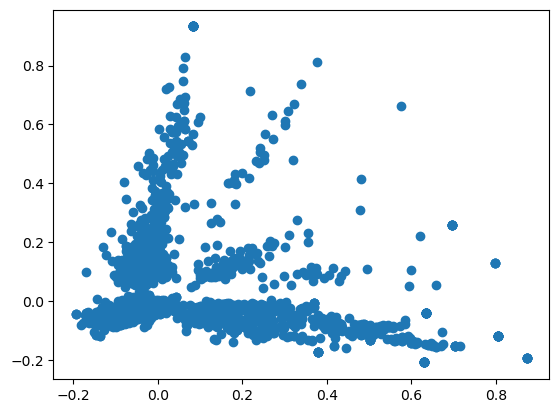

In [34]:
pca = PCA(n_components=2)
matrix_pca = pca.fit_transform(matrix.toarray())
plt.scatter(matrix_pca[:,0], matrix_pca[:,1])
plt.show()

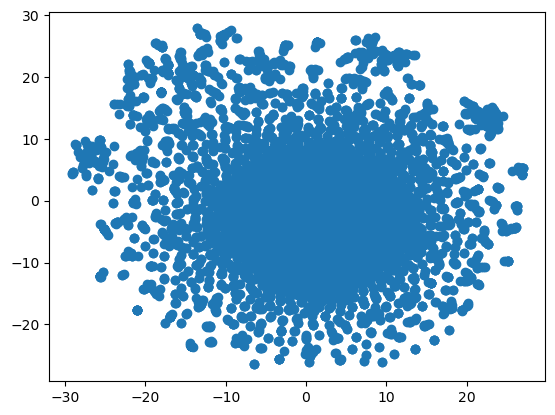

In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(matrix.toarray())

plt.scatter(tsne_result[:,0], tsne_result[:,1])
plt.show()

C:\Users\Adrian D02\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Adrian D02\AppData\Local\Temp\ipykernel_3188\2961567944.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='UMAP1', y='UMAP2', data=df_umap, palette='viridis')


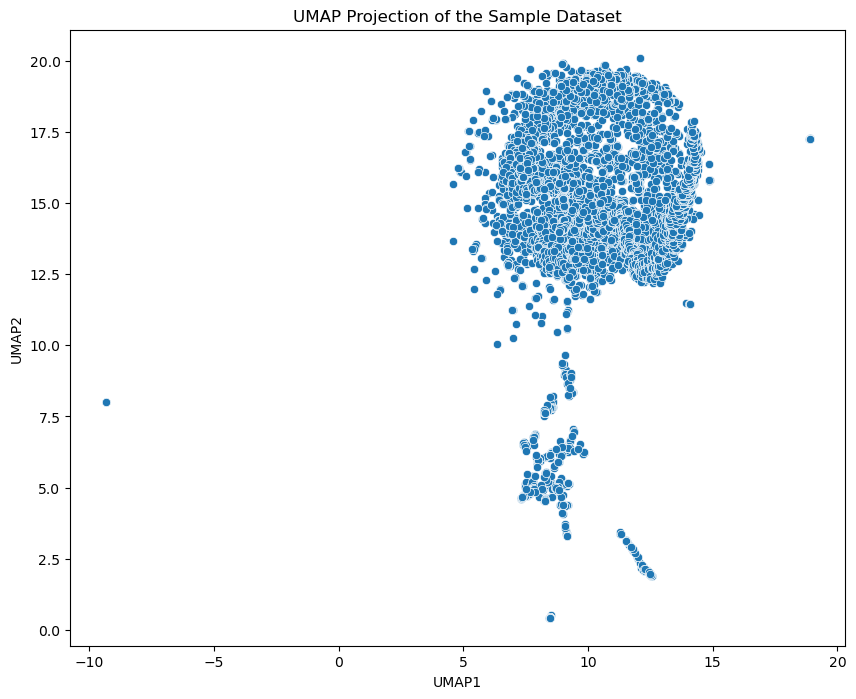

In [36]:
import umap
import seaborn as sns

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(matrix.toarray())

# Create a DataFrame for easy plotting
df_umap = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

# Plot the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=df_umap, palette='viridis')
plt.title('UMAP Projection of the Sample Dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()